<a href="https://colab.research.google.com/github/jilyy7/main/blob/main/NLP(deepL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy
import pandas as pd
from textblob import TextBlob
import csv
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
nlp=spacy.load("en_core_web_sm")
file='feedback_data.csv'


In [ ]:
with open(file,'r',encoding='utf-8') as file_path:
  feedback_data=file_path.readlines()
output_csv_path="feedback_analysis_result.csv"
csv_header=["Feedback Index","sentiment Polarity","sentiment subjectivity","named_entity","prefered contact method"]

with open(output_csv_path,"w", newline="", encoding="utf-8") as csv_file:
  csv_writer=csv.writer(csv_file)

  csv_writer.writerow(csv_header)

  for idx,narrative in enumerate(feedback_data,start=1):
    print(f"\nProcessing feedback {idx}:")
    print("------------------------------")
    print(narrative.strip())

    doc=nlp(narrative)
    blob=TextBlob(narrative)
    Sentiment_Polarity=blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    print(f"sentiments:{Sentiment_Polarity}(Polarity),{sentiment_subjectivity}(subjectivity)")

    entities=[(ent.text,ent.label_) for ent in doc.ents]
    print("Named Entities:",entities)

    prefered_contact_method="chat" if "email" not in narrative.lower() else "email"

    print(f"preferred contact method: {prefered_contact_method}")

    csv_writer.writerow([idx,Sentiment_Polarity,sentiment_subjectivity,entities,prefered_contact_method])



Processing feedback 1:
------------------------------
Your products are excellent. I really love the quality! However, delivery to my location in Los Angeles was a bit slow. abbey@email.com
sentiments:0.44166666666666665(Polarity),0.6666666666666666(subjectivity)
Named Entities: [('Los Angeles', 'GPE')]
preferred contact method: email

Processing feedback 2:
------------------------------
The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
sentiments:0.13636363636363635(Polarity),0.45454545454545453(subjectivity)
Named Entities: [('New York', 'GPE')]
preferred contact method: email

Processing feedback 3:
------------------------------
The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
sentiments:0.48409090909090907(Polarity),0.7511363636363636(subjectivity)
Named Entities: [('San Francisco', 'GPE')]
preferred contact method: chat

Processing feedback 4

In [ ]:
df=pd.read_csv('feedback_analysis_result.csv')

In [ ]:
df

,Feedback Index,sentiment Polarity,sentiment subjectivity,named_entity,prefered contact method
0,1,0.441667,0.666667,"[('Los Angeles', 'GPE')]",email
1,2,0.136364,0.454545,"[('New York', 'GPE')]",email
2,3,0.484091,0.751136,"[('San Francisco', 'GPE')]",chat
3,4,-0.750000,0.750000,"[('Chicago', 'GPE')]",email


In [ ]:
df.describe()

,Feedback Index,sentiment Polarity,sentiment subjectivity
count,4.000000,4.000000,4.000000
mean,2.500000,0.078030,0.655587
std,1.290994,0.573339,0.139743
min,1.000000,-0.750000,0.454545
25%,1.750000,-0.085227,0.613636
50%,2.500000,0.289015,0.708333
75%,3.250000,0.452273,0.750284
max,4.000000,0.484091,0.751136


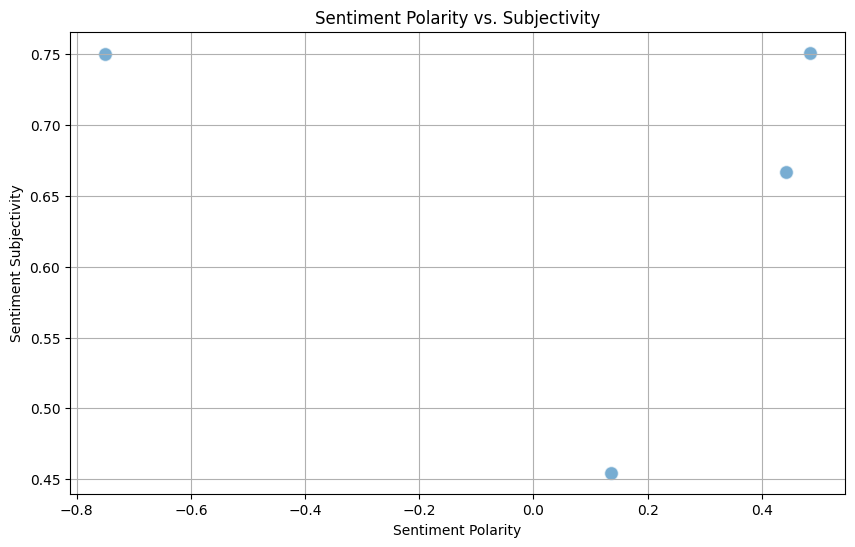

In [ ]:
# Plot the scatter plot for sentiment polarity vs. subjectivity
plt.figure(figsize=(10, 6))
plt.scatter(df['sentiment Polarity'], df['sentiment subjectivity'], alpha=0.6, edgecolors='w', s=100)

# Add titles and labels
plt.title('Sentiment Polarity vs. Subjectivity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')

# Show grid
plt.grid(True)

# Show the plot
plt.show()


<ipython-input-11-6586877b1ccb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='prefered contact method',palette='muted')


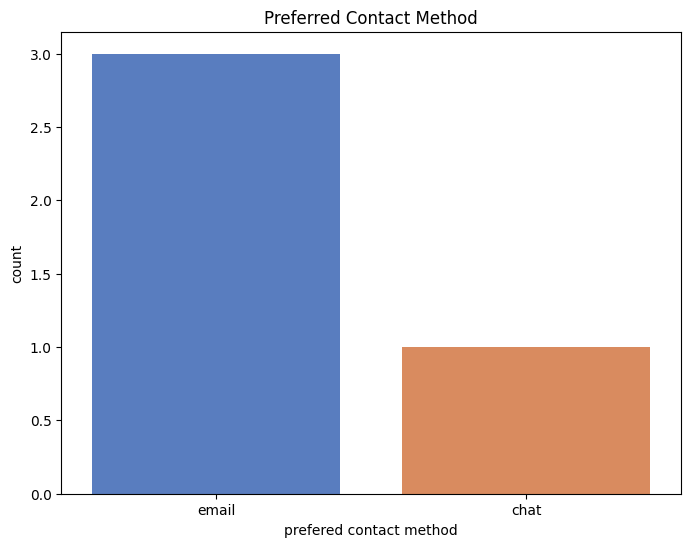

In [ ]:
#plot the prefered contact method
import pandas as pd
import matplotlib.pyplot as plt


# Plot the results
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='prefered contact method',palette='muted')
plt.title('Preferred Contact Method')
plt.xlabel('prefered contact method')
plt.ylabel('count')
plt.show()

In [ ]:
df.isnull().sum()

Feedback Index             0
sentiment Polarity         0
sentiment subjectivity     0
named_entity               0
prefered contact method    0
dtype: int64

In [ ]:
correlation_matrix = df[['sentiment Polarity', 'sentiment subjectivity']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
                        sentiment Polarity  sentiment subjectivity
sentiment Polarity                1.000000               -0.195858
sentiment subjectivity           -0.195858                1.000000


In [ ]:
contact_method_counts = df['prefered contact method'].value_counts()
contact_method_counts

prefered contact method
email    3
chat     1
Name: count, dtype: int64

In [ ]:
entity_counts = df['named_entity'].explode().value_counts()
entity_counts

named_entity
[('Los Angeles', 'GPE')]      1
[('New York', 'GPE')]         1
[('San Francisco', 'GPE')]    1
[('Chicago', 'GPE')]          1
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Sentiment Polarity')

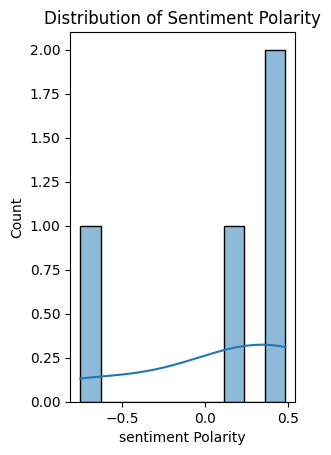

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(df['sentiment Polarity'], kde=True, bins=10)
plt.title('Distribution of Sentiment Polarity')

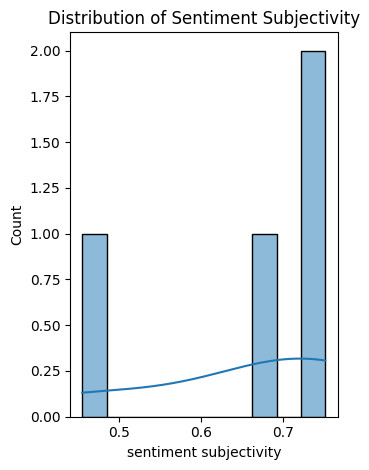

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(df['sentiment subjectivity'], kde=True, bins=10)
plt.title('Distribution of Sentiment Subjectivity')

plt.tight_layout()
plt.show()

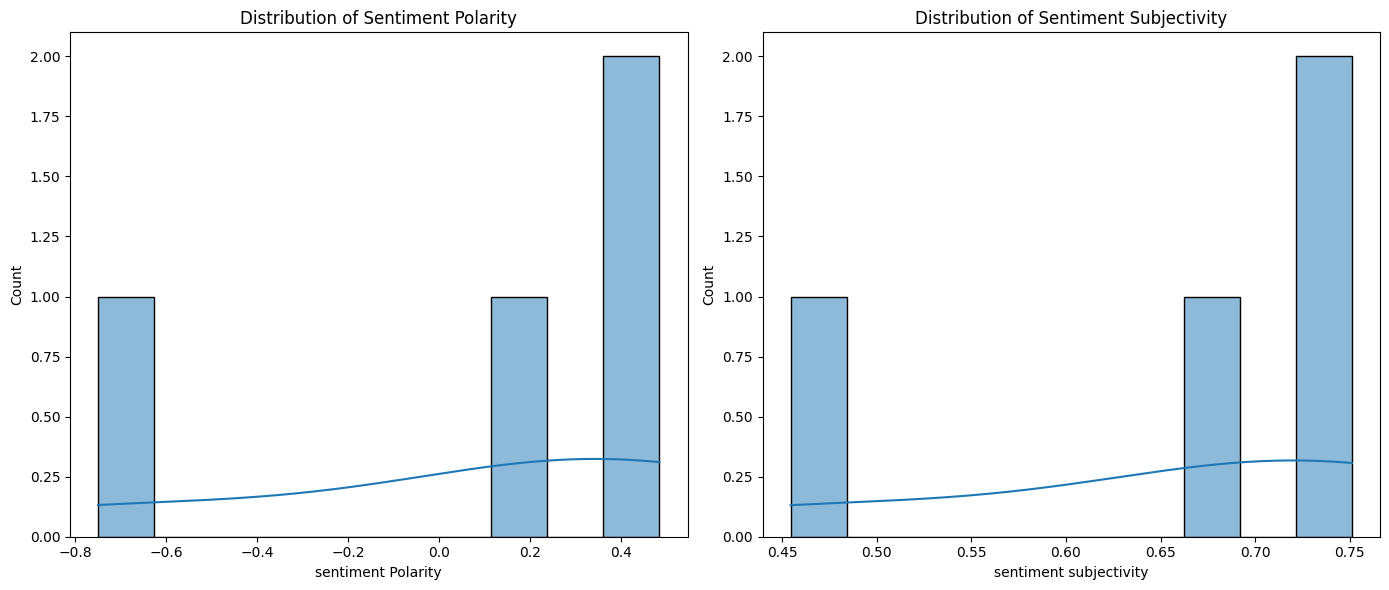

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['sentiment Polarity'], kde=True, bins=10)
plt.title('Distribution of Sentiment Polarity')

plt.subplot(1, 2, 2)
sns.histplot(df['sentiment subjectivity'], kde=True, bins=10)
plt.title('Distribution of Sentiment Subjectivity')

plt.tight_layout()
plt.show()